<a href="https://colab.research.google.com/github/twelvesense/first-repository/blob/master/ExplNode02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 (1) 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [50]:
import os
from turtle import shape
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## (1) 데이터 가져오기

In [51]:
diabetes=load_diabetes()
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
diabetes['data'].shape

(442, 10)

In [6]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [7]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
diabetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [10]:
df_X = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df_y = pd.Series(diabetes['target'])

In [11]:
NUM_FEATURES = 10

In [14]:
## finding NaN
board_NaN = ''
if sum(np.isnan(df_X['age'])) != 0: board_NaN.append('age')
if sum(np.isnan(df_X['sex'])) != 0: board_NaN.append('-sex')
if sum(np.isnan(df_X['bmi'])) != 0: board_NaN.append('-bmi')
if sum(np.isnan(df_X['bp']))  != 0: board_NaN.append('-bp')
if sum(np.isnan(df_X['s1']))  != 0: board_NaN.append('-s1')
if sum(np.isnan(df_X['s2']))  != 0: board_NaN.append('-s2')
if sum(np.isnan(df_X['s3']))  != 0: board_NaN.append('-s3')
if sum(np.isnan(df_X['s4']))  != 0: board_NaN.append('-s4')
if sum(np.isnan(df_X['s5']))  != 0: board_NaN.append('-s5')
if sum(np.isnan(df_X['s6']))  != 0: board_NaN.append('-s6')
if sum(np.isnan(df_y))        != 0: board_NaN.append('-y')
if board_NaN == '': 
  print("Nothing")
else:
  print(board_NaN)

Nothing


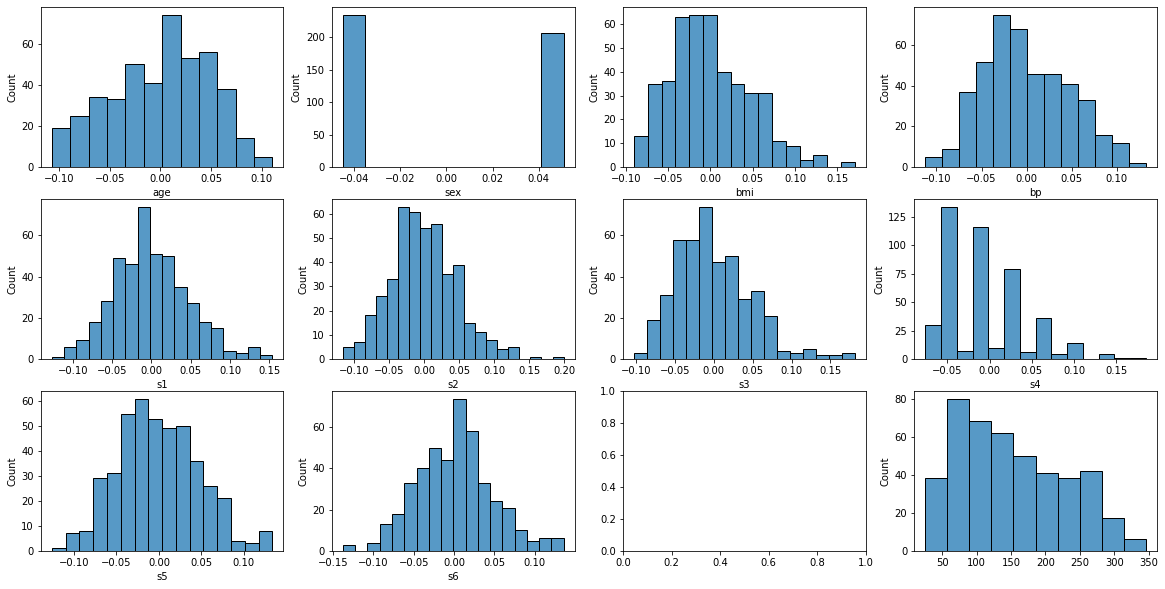

In [22]:
## finding outlier
fig, axes= plt.subplots(3,4)
plt.rcParams["figure.figsize"] = (20, 10)
sns.histplot(df_X['age'], ax=axes[0, 0])
sns.histplot(df_X['sex'], ax=axes[0, 1])
sns.histplot(df_X['bmi'], ax=axes[0, 2])
sns.histplot(df_X['bp'], ax=axes[0, 3])
sns.histplot(df_X['s1'], ax=axes[1, 0])
sns.histplot(df_X['s2'], ax=axes[1, 1])
sns.histplot(df_X['s3'], ax=axes[1, 2])
sns.histplot(df_X['s4'], ax=axes[1, 3])
sns.histplot(df_X['s5'], ax=axes[2, 0])
sns.histplot(df_X['s6'], ax=axes[2, 1])
sns.histplot(df_y, ax=axes[2, 3])
fig.show()


## (2) 모델에 입력할 데이터 X 준비하기

In [23]:
X = np.array(df_X)          # X = df_X.to_numpy()
X.shape

(442, 10)

## (3) 모델에 입력할 데이터 y 준비하기

In [24]:
y = np.array(df_y)         # y = df_y.to_numpy()
y.shape

(442,)

## (4) train 데이터와 test 데이터로 분리하기

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

## (5) 모델 준비하기

In [30]:
def model(X, W, b):
    predictions = 0
    for i in range(NUM_FEATURES):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 및 loss 정의하기

In [35]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [36]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## (7) 기울기를 구하는 gradient 함수 구현하기

In [32]:
def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

## (8) 하이퍼 파라미터인 학습률 설정하기

In [33]:
LEARNING_RATE = 0.45             # the result of try and error

## (9) 모델 학습하기

In [38]:
## comparing features with the target

# print(np.corrcoef(X.T[0], y))                   # 0.18788875,  age
# print(np.corrcoef(X.T[1], y))                   # 0.043062,    sex
# print(np.corrcoef(X.T[2], y))                   # 0.58645013,  bmi
# print(np.corrcoef(X.T[3], y))                   # 0.44148385,  bp
# print(np.corrcoef(X.T[4], y))                   # 0.21202248,  s1
# print(np.corrcoef(X.T[5], y))                   # 0.17405359,  s2
# print(np.corrcoef(X.T[6], y))                   # -0.39478925, s3
# print(np.corrcoef(X.T[7], y))                   # 0.43045288,  s4
# print(np.corrcoef(X.T[8], y))                   # 0.56588343,  s5
# print(np.corrcoef(X.T[9], y))                   # 0.38248348,  s6

X_train_del = np.delete(X_train, 6, 1)          # s3
X_test_del = np.delete(X_test, 6, 1)            # s3
NUM_FEATURES = 9

In [39]:
losses = []
num_iterations = 10000

W = np.random.rand(NUM_FEATURES)
b = np.random.rand()

for i in range(1, (num_iterations + 1)):
    dW, db = gradient(X_train_del, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train_del, W, b, y_train)
    losses.append(L)

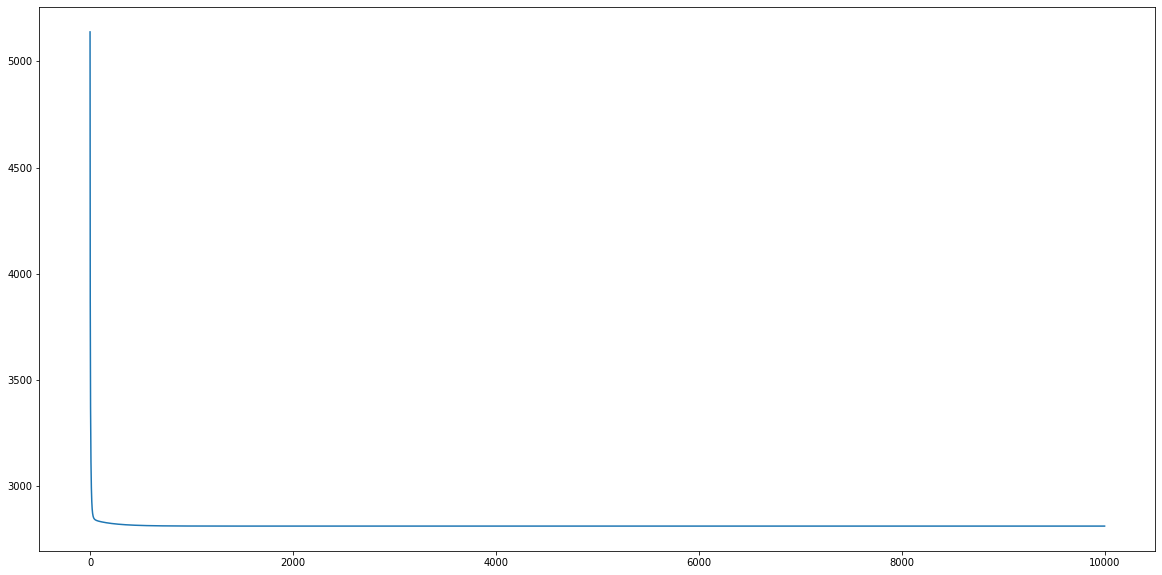

In [41]:
plt.plot(losses)
plt.show()    

## (10) test 데이터에 대한 성능 확인하기

In [42]:
prediction = model(X_test_del, W, b)
mse = loss(X_test_del, W, b, y_test)
print(mse)

3110.6662495496653


## (11) 정답 데이터와 예측한 데이터 시각화하기

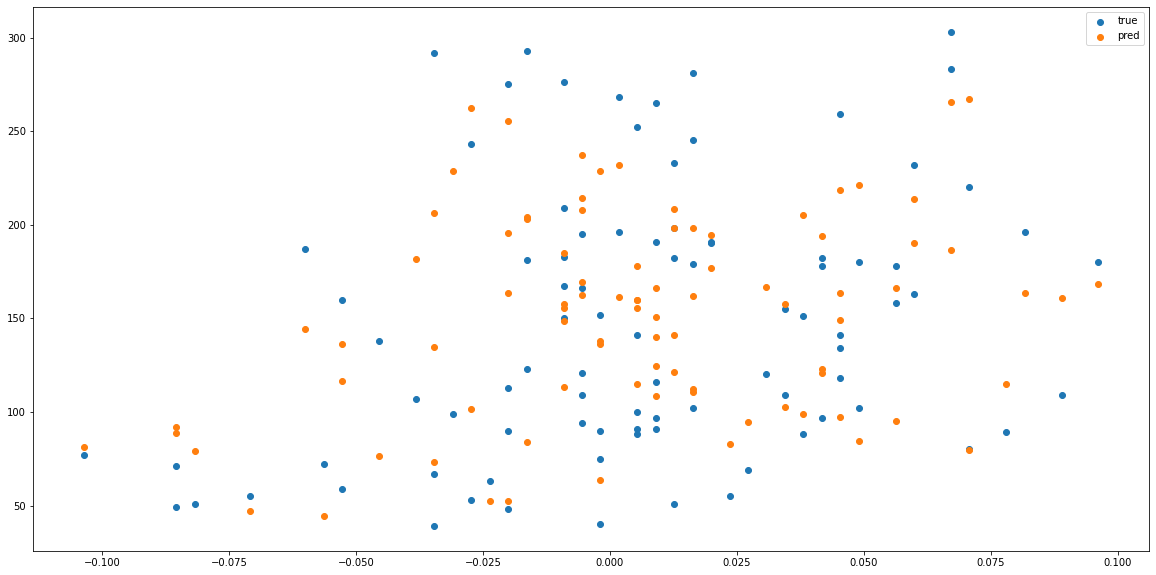

In [43]:
plt.scatter(X_test_del[:, 0], y_test, label="true")
plt.scatter(X_test_del[:, 0], prediction, label="pred")
plt.legend()
plt.show()

>    

>    

>    

>    












# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기

In [76]:
# path_file = 'https://github.com/twelvesense/first-repository/blob/master/data/train.csv'
# train = pd.read_csv(path_file)
# train = pd.read_csv("https://github.com/twelvesense/first-repository/blob/master/data/train.csv")
# train = pd.read_csv('http://github.com/twelvesense/first-repository/blob/master/data/test.csv')
# train = pd.read_csv('https://drive.google.com/drive/folders/1zpjPKWIyA65aZMbd9IUykFhosk-HCp5i/test.csv')

#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')
fiel = '/content/drive/MyDrive/Colab Notebooks/test.csv'
train = pd.read_csv(fiel)
type(train)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


pandas.core.frame.DataFrame

In [57]:
!ls

sample_data
